## Digit classification

In [68]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [48]:
def data_load(data, verbose=True):
    X = data.data
    y = data.target
    
    if verbose:
        print(data.keys())
        print(f'target names: {data.target_names}')
        print(f'data shape: {X.shape}')
        print(f'label shape: {y.shape}')
    
    return X, y

digits = load_digits() #data load
digits_data, digits_label = data_load(digits)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
target names: [0 1 2 3 4 5 6 7 8 9]
data shape: (1797, 64)
label shape: (1797,)


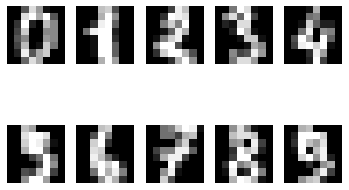

In [5]:
for i in range(10):
    plt.subplot(2, 5, i+1) #nrows, ncols, index
    plt.imshow(digits_data[i].reshape(8,8), cmap='gray') #shape(8,8) image show channel='gray'
    plt.axis('off') #delete axis & lable name
plt.show()

In [28]:
seed = 42
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
svm_model = svm.SVC()
sgd = SGDClassifier()
logit = LogisticRegression(max_iter=4000) #maxiter 100 is the default, but it does not converge to this number

In [120]:
def run(model, data, label, features, importance=False, verbose=True):
    
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=seed)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if verbose:
        print(f'{model}')
        print(f'class report: {classification_report(y_test, pred)}')
        print(confusion_matrix(y_test, pred))
        print()
        if model.__class__.__name__ == 'RandomForestClassifier' and importance:
            importances = model.feature_importances_
            std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
            
            forest_importances = pd.Series(importances, index=features)
            
            fig = plt.figure(figsize=(20,20))
            ax = fig.add_subplot(111)
            forest_importances.plot.bar(yerr=std, ax=ax)
            ax.set_title("Feature importances")
            plt.xticks(fontsize=20)
            fig.tight_layout()
            
        print('------------------------------------------------------')
        print()
        
    return pred

In [113]:
dt_pred = run(dt, digits_data, digits_label, digits.feature_names)
rf_pred = run(rf, digits_data, digits_label, digits.feature_names)
svm_pred = run(svm_model, digits_data, digits_label, digits.feature_names)
sgd_pred = run(sgd, digits_data, digits_label, digits.feature_names)
logit_pred = run(logit, digits_data, digits_label, digits.feature_names)

DecisionTreeClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

[[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 24  3  1  1  1  1  2  0]
 [ 0  0  1 29  0  1  0  1  1  1]
 [ 0  0  1  0 42  0  0  2  1  0]
 [ 0  0  1  0  1 40  0

## 데이터 분석
이미지 데이터이기 때문에 별도로 df로 변환은 하지 않았고, resize, noramlization 없이도 모델이 잘 동작하기 때문에 데이터를 그대로 사용했다.

## 평가 지표

숫자 분류의 경우 svm모델이 단 5개만 틀리는 압도적인 성능을 보여줬다.  
평가 지표 또한 단순한 숫자 분류이기 때문에 accruacy를 기준으로 해서 0.99를 달성한 SVM 모델을 선택하는 것이 합리적이라고 생각했다.

## Wine classification

In [49]:
wine = load_wine() #data load
wine_data, wine_label = data_load(wine)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
target names: ['class_0' 'class_1' 'class_2']
data shape: (178, 13)
label shape: (178,)


In [118]:
dt_pred = run(dt, wine_data, wine_label, wine.feature_names)
rf_pred = run(rf, wine_data, wine_label, wine.feature_names)
svm_pred = run(svm_model, wine_data, wine_label, wine.feature_names)
sgd_pred = run(sgd, wine_data, wine_label, wine.feature_names)
logit_pred = run(logit, wine_data, wine_label, wine.feature_names)

DecisionTreeClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]

------------------------------------------------------

RandomForestClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(max_iter=4000)
class report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

------------------------------------------------------



## 데이터 분석

모델의 퍼포먼스가 좋기 때문에 feature selection과정이 별도로 필요한 것 같지 않아서 그대로 진행했다.

## 평가 지표
모델은 randomforest와 logistic regression이 압도적인 성능으로 모든 정답을 맞춰서 precision과 recall이 1이 나왔다. 따라서 이 두 모델을 선택하는 것이 좋아 보인다.  
와인의 경우 Precision Recall과 관련해서 암의 판별 처럼 특정 지표가 중요하다고 보는 기준이 모호하기 때문에 분류의 정확도를 기준으로 평가해도 괜찮을 것 같다.   
따라서 accuracy를 기준으로 모델을 선정할 수 있다고 생각한다.

## Breast Cancer classification

In [50]:
cancer = load_breast_cancer() #data load
cancer_data, cancer_label = data_load(cancer)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
target names: ['malignant' 'benign']
data shape: (569, 30)
label shape: (569,)


In [54]:
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [60]:
malignant = cancer.data[cancer.target==0]
begin = cancer.data[cancer.target==1]

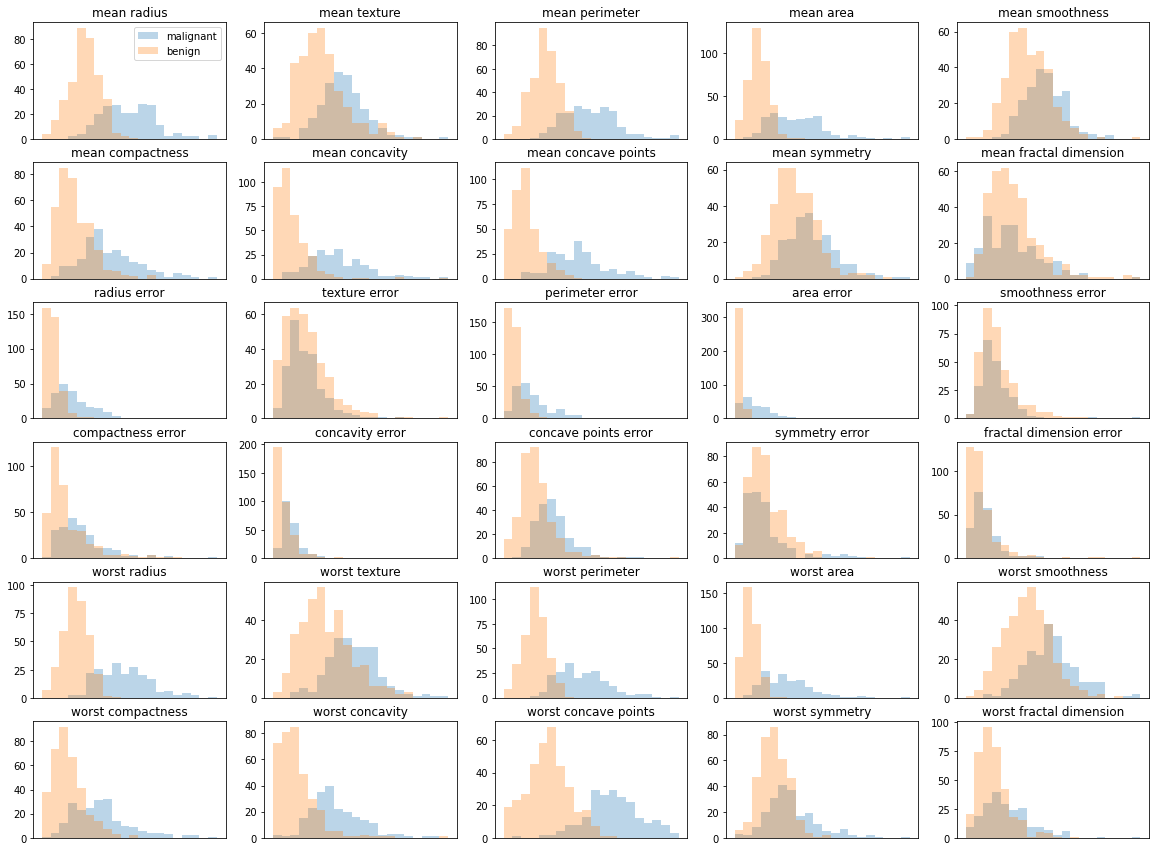

In [64]:
plt.figure(figsize=(20,15))

for col in range(len(cancer.data[1])):
    plt.subplot(6,5,col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)
    
    plt.hist(malignant[:, col], bins=bins, alpha=0.3) # 하나의 figure에 feature별로 각 클래스 분포를 도수분포표로 나타냄.
    plt.hist(begin[:, col], bins=bins, alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])

<AxesSubplot:>

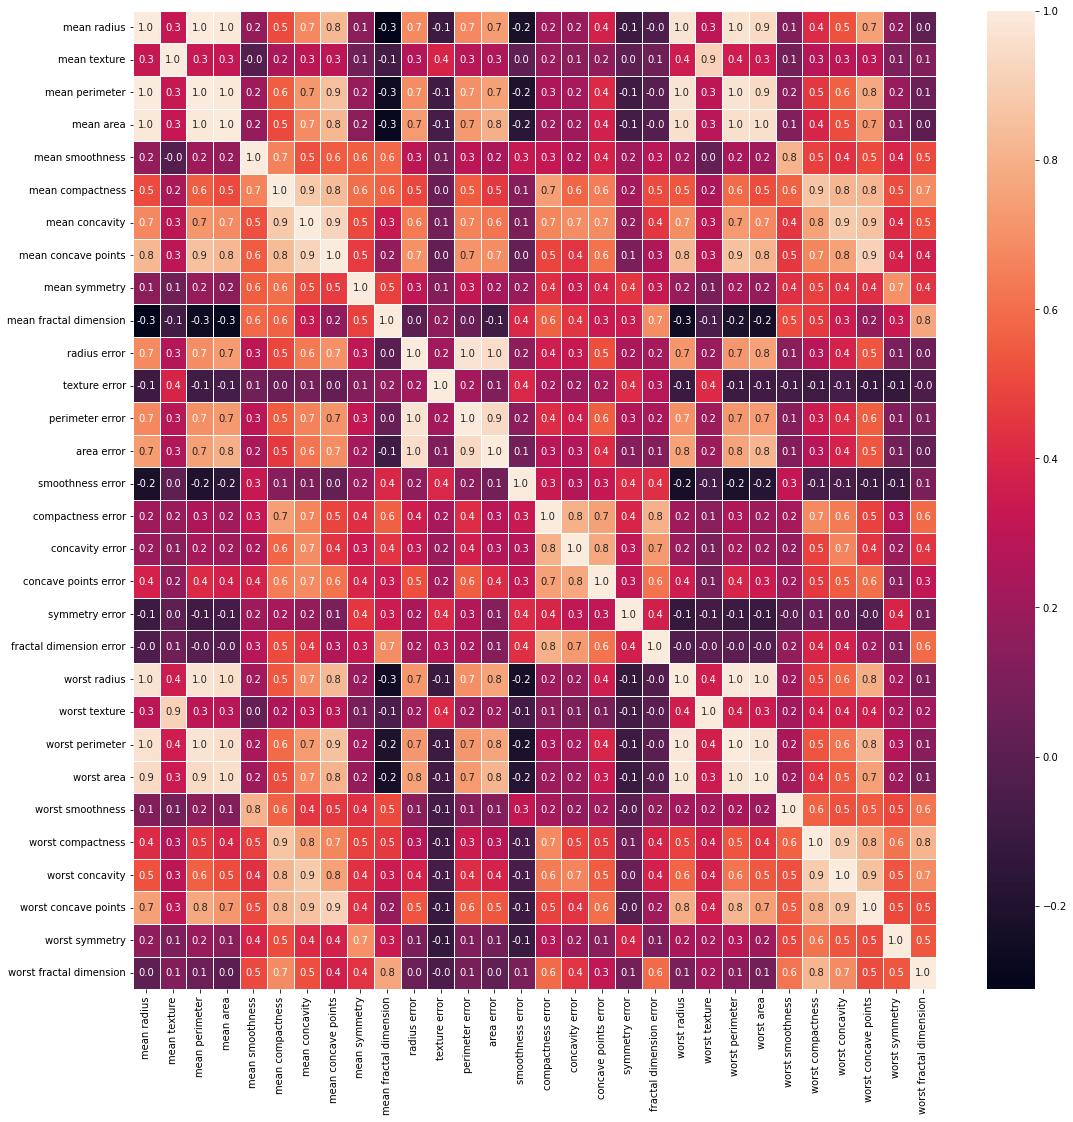

In [70]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cancer_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Feature Selection
- 변수 상관관계가 높은 feature들 제거

In [75]:
drop_list = ['mean radius','mean perimeter','worst radius','worst perimeter','radius error']
new_cancer_df = cancer_df.drop(drop_list, axis=1)

<AxesSubplot:>

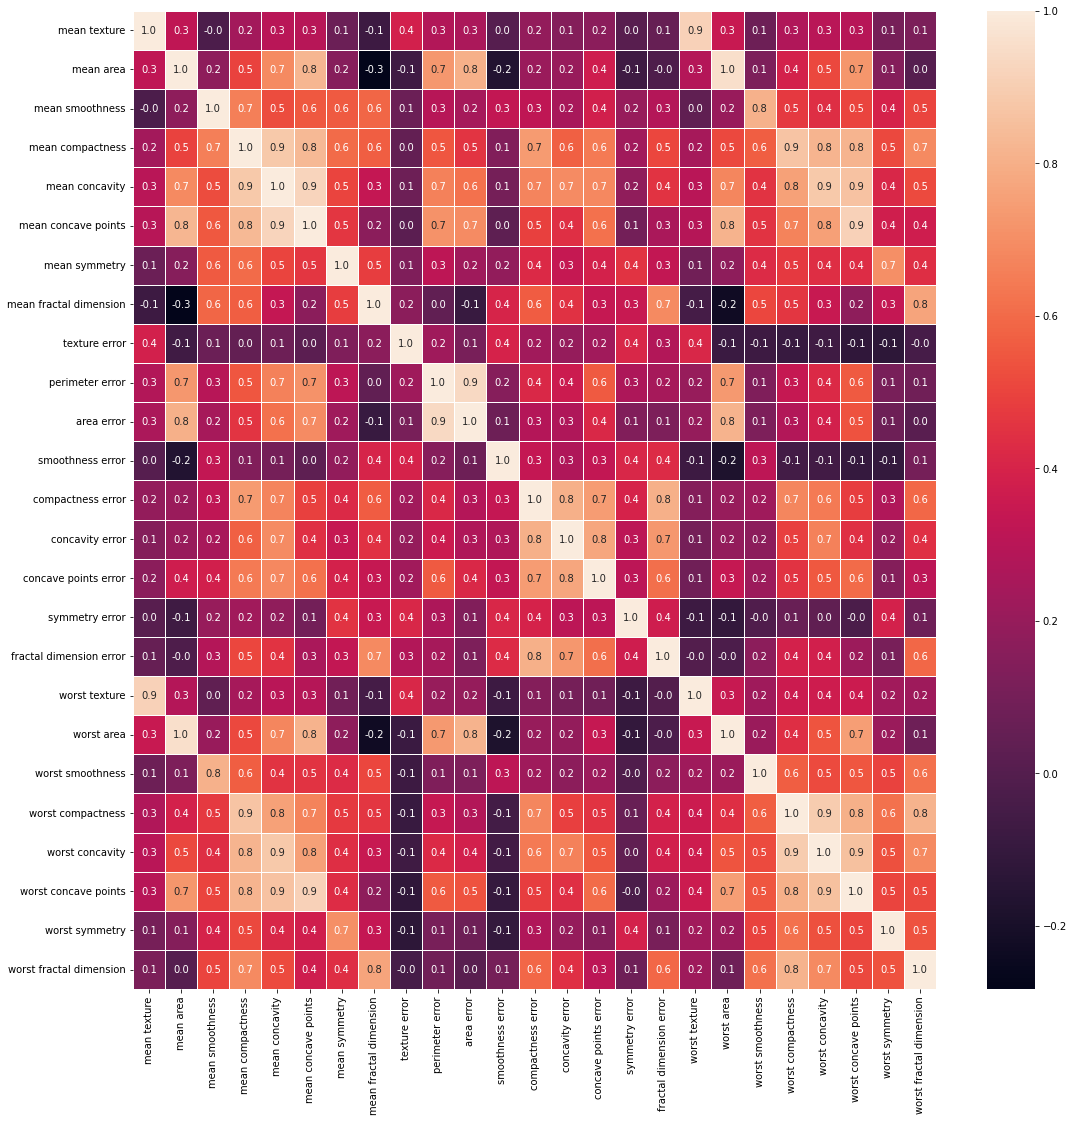

In [76]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(new_cancer_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

DecisionTreeClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[40  3]
 [ 3 68]]

------------------------------------------------------

RandomForestClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]

------------------------------------------------------

SVC()
class report:               precision    recall  f1-score   support

           

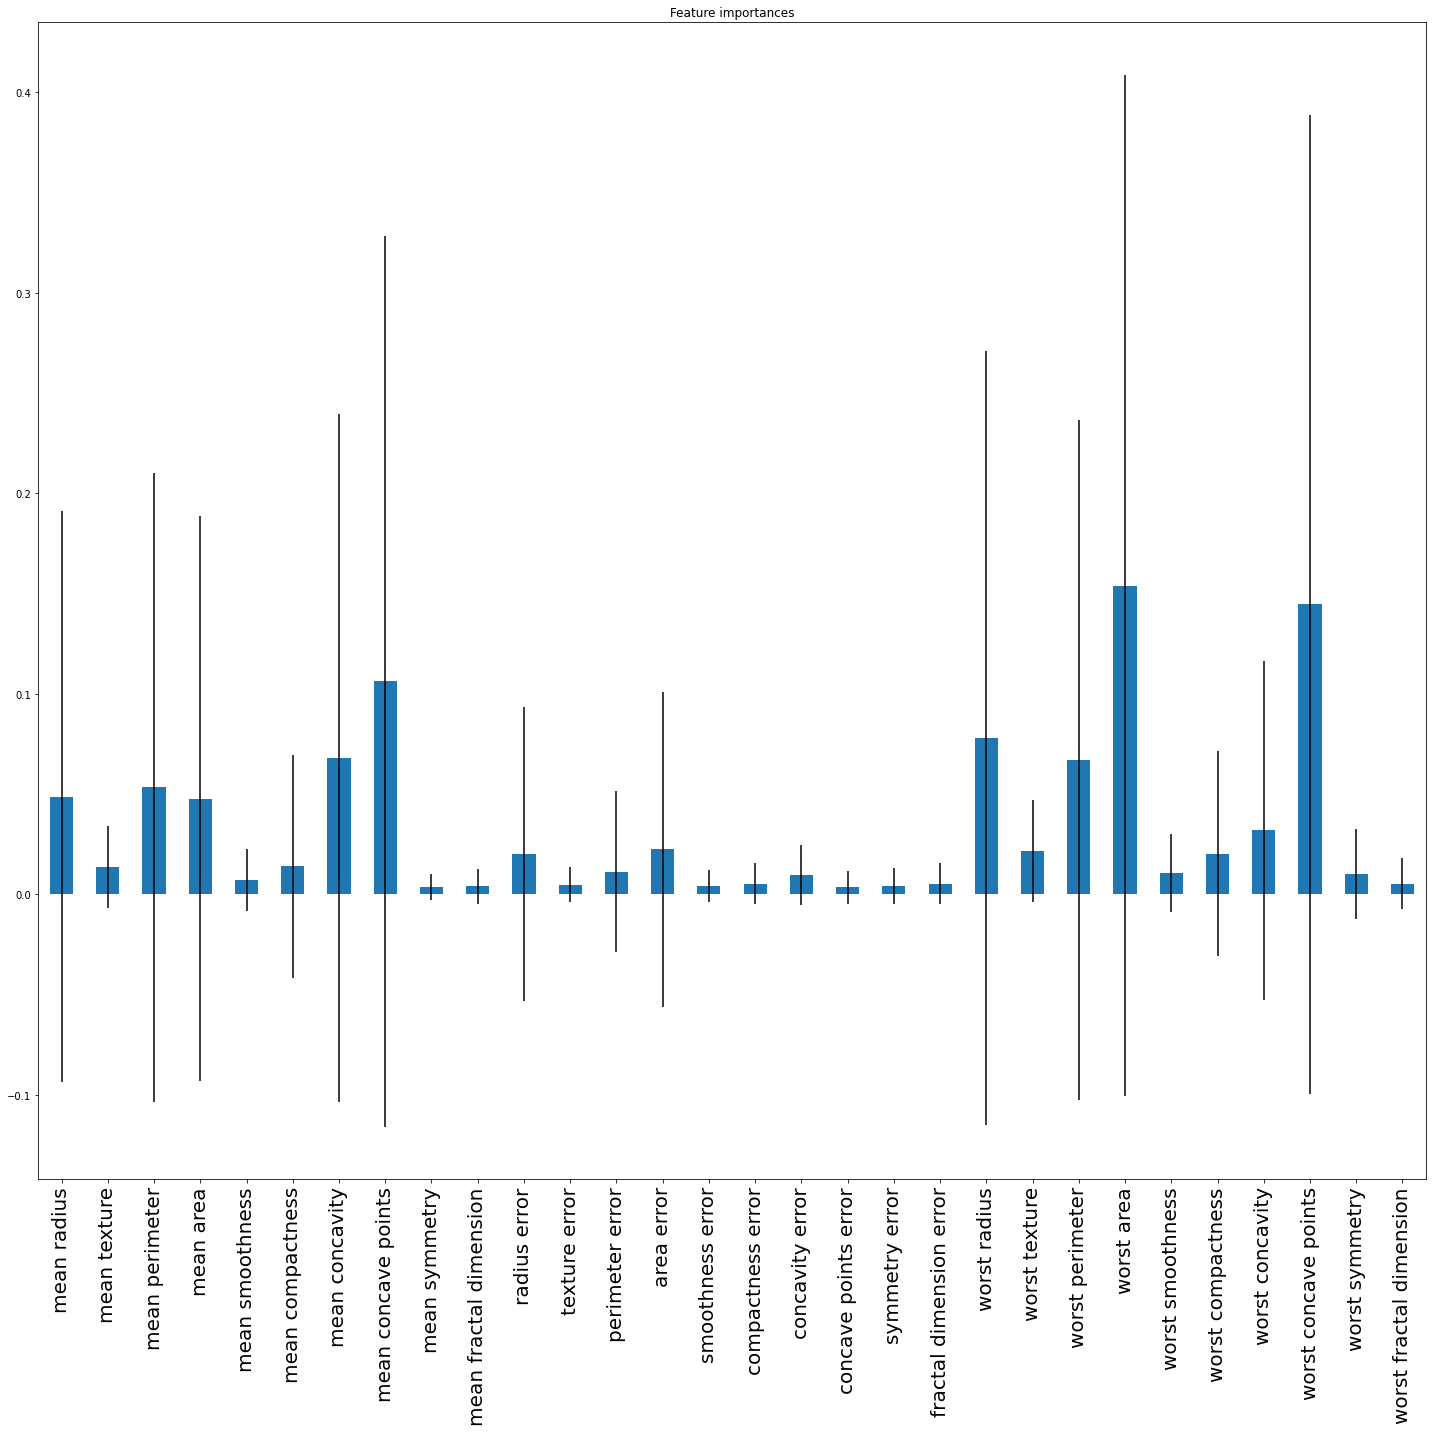

In [121]:
#original data

dt_pred = run(dt, cancer_data, cancer_label, cancer.feature_names, importance=True)
rf_pred = run(rf, cancer_data, cancer_label, cancer.feature_names, importance=True)
svm_pred = run(svm_model, cancer_data, cancer_label, cancer.feature_names, importance=True)
sgd_pred = run(sgd, cancer_data, cancer_label, cancer.feature_names, importance=True)
logit_pred = run(logit, cancer_data, cancer_label, cancer.feature_names, importance=True)

In [84]:
# data after feature selection
dt_pred = run(dt, new_cancer_df, cancer_label)
rf_pred = run(rf, new_cancer_df, cancer_label)
svm_pred = run(svm_model, new_cancer_df, cancer_label)
sgd_pred = run(sgd, new_cancer_df, cancer_label)
logit_pred = run(logit, new_cancer_df, cancer_label)

DecisionTreeClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.94      0.93      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[[39  4]
 [ 5 66]]
------------------------------------------------------

RandomForestClassifier(random_state=42)
class report:               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]
------------------------------------------------------

SVC()
class report:               precision    recall  f1-score   support

           0 

## 데이터 분석

단순 상관관계를 기준으로 feature를 drop하는 것은 오히려 모델의 성능을 저하시킬 수 있음을 확인했다.  
feature importance 기준으로 낮은 feature가 몇개 나오는데 '낮다'의 기준점이 모호해서 제거하지 않고 그대로 사용했다.

## 평가 지표

전반적으로, 모델의 성능은 비슷한 것을 확인할 수 있다.  
하지만 암을 분류하는 문제이므로, 악성(암) 환자를 양성으로 분류하는 것은 굉장히 잘못 된 일이다.  
따라서 평가 기준 지표를 Recall로 잡고, Recall 지표가 가장 좋은 Random Forest 모델이 잘 동작한다고 볼 수 있다.